# Vacation-planning weather analysis

In [36]:
# Import all dependencies and styles needed for notebook.

# Set Jupyter Notebook to display plots inline.
%matplotlib inline

# Import dependencies.
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Import sqlalchemy dependencies.
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# Use fancy matplotlib style for plots.
style.use('fivethirtyeight')

# Use Sqlalchemy library (ORM) to read sqlite database into Python object

In [37]:
# Create db engine for sqlite db.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create inspector object to view tables and columns in sqlite db.
inspector = inspect(engine)

# Use inspector object to print all table names and column schemas.
tables = inspector.get_table_names()
for t in tables:
    # Print table name.
    print(t)
    # Get all schema info for each column.
    column_info = inspector.get_columns(t)
    # For each column, print out schema info.
    for x in column_info:
        print(x)

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoin

In [ ]:
# Start query session for db engine.
session = Session(engine)

In [38]:
# Create class references to work with tables.

# Read (reflect) sqlite db into SQLAlchemy Base object.
Base = automap_base()
Base.prepare(engine, reflect = True)

# Create reference to each table in Base.
Station = Base.classes.station
Measurement = Base.classes.measurement

# Exploratory Climate Analysis
## Precipitation Analysis

In [39]:
# View first 5 records from prcp column
result = session.query(Measurement.prcp).limit(5).all()
result

[(0.08), (0.0), (0.0), (0.0), (None)]

In [40]:
# View first 5 records from date column.
result = session.query(Measurement.date).limit(5).all()
result

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-06')]

In [66]:
# Compute date one year before last date present in database.

# Query last date in database.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Print last_date
print(last_date)

# ('2017-08-23',) looks like a tuple of strings...

# Index into last_date.
last_date_string = last_date[0]

# Format string as datetime object.
format_str = '%Y-%m-%d'
datetime_obj = dt.datetime.strptime(last_date_string, format_str)

# Subtract 365 years from datetime object.
year_ago = datetime_obj - dt.timedelta(days = 365)

('2017-08-23',)


In [67]:
# Get date and precipitation over last year of data.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Convert results to Pandas DataFrame.
precip_df = pd.DataFrame(results)

# Set df index to date column.
precip_df.set_index('date')

# Sort df by date.
precip_df.sort_index()

precip_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


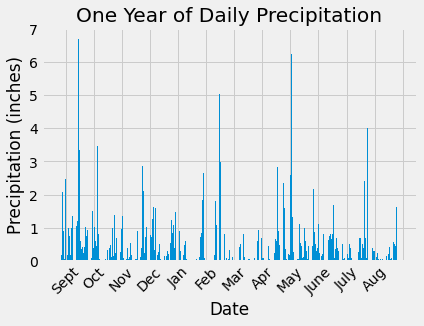

In [71]:
# Plot precipitation by day for last year of data.
fig, ax = plt.subplots()
plt.bar(precip_df["date"], precip_df["prcp"])

# Title and axis labels
plt.title('One Year of Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

# Format x-axis tick labels
# Shift first label 6 forward to account for data starting on 8/24.
ax.set_xticks(np.arange(7, 372, 30))
xticklabels = ["Sept", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug"]
ax.set_xticklabels(xticklabels, rotation = 45)

plt.show()

In [69]:
# Precipitation summary statistics for one year.
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [106]:
# Print number of stations, print Station table.
print(str(session.query(func.count(Station.id)).all()[0][0]) + " stations:")
print("")
result = session.query(Station)
for row in result:
    print(row.id, row.station, row.name, row.latitude, row.longitude, row.elevation)

9 stations:

1 USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
2 USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
3 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
4 USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
5 USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
6 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
7 USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
8 USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
9 USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4


In [126]:
# List the most active stations in Measurements table by grouping by station, 
# aggregating to count, and sorting descending.

# Query
result = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Print result set.
for row in result:
    print(row)
    
print("")

# Extract first cell of first row.
highest_number = result[0][0]

print("Station " + str(highest_number) + " has the highest number of observation days.")

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)

Station USC00519281 has the highest number of observation days.


In [144]:
# Print lowest, highest,and mean precipitation reported by station USC00519281.
lowest = session.query(func.min(Measurement.prcp)).filter(Measurement.station == highest_number)
highest = session.query(func.max(Measurement.prcp)).filter(Measurement.station == highest_number)
average = session.query(func.avg(Measurement.prcp)).filter(Measurement.station == highest_number)

print("Lowest precipitation: " + str(lowest[0][0]) + " inches")
print("Highest precipitation: " + str(highest[0][0]) + " inches")
print("Average precipitation: " + str(round(average[0][0], 2)) + " inches")

Lowest precipitation: 0.0 inches
Highest precipitation: 9.64 inches
Average precipitation: 0.21 inches


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
